# Project: Investigate a Dataset (No-show-appointments)

## Table of Contents

##### 1-Introduction
##### 2-Data Wrangling
##### 3-Exploratory Data Analysis
##### 4-Conclusions



## Introduction


### This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. 


### also we need to answer below Questions :-
#### What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
#### Does the neighborhood in which the patient live influence the patient’s decision to attend or not?


In [111]:
#### importing the needed imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns


## Data Wrangling



### General Properties

In [112]:
# Loading data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')


#   general look
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [113]:
#   programmatic look
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [114]:
#   programmatic look
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [115]:
#   change clomns name to be more easy
df.rename(columns = {'PatientId': 'Patient_Id','AppointmentID': 'Appointment_ID','ScheduledDay': 'Scheduled_Day','AppointmentDay': 'Appointment_Day','Neighbourhood': 'Neighborhood','Hipertension': 'Hypertension', 'Handcap': 'Handicap','No-show':'No_show'}, inplace = True)
print(df.columns)

Index(['Patient_Id', 'Appointment_ID', 'Gender', 'Scheduled_Day',
       'Appointment_Day', 'Age', 'Neighborhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No_show'],
      dtype='object')


In [116]:
#   last programmatic look
print('Age: ',sorted(df.Age.unique()))
print('Gender:',df.Gender.unique())
print('Diabetes: ',df.Diabetes.unique())
print('Alcoholism: ',df.Alcoholism.unique())
print('Hypertension: ',df.Hypertension.unique())
print('Handicap: ',df.Handicap.unique())
print('Scholarship: ',df.Scholarship.unique())
print('SMS Received: ',df.SMS_received.unique())
print('No Show: ',df.No_show.unique())

Age:  [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
Gender: ['F' 'M']
Diabetes:  [0 1]
Alcoholism:  [0 1]
Hypertension:  [1 0]
Handicap:  [0 1 2 3 4]
Scholarship:  [0 1]
SMS Received:  [0 1]
No Show:  ['No' 'Yes']



### Data Cleaning 

##### remove Age = -1
##### Patient_Id should be int not float
##### Scheduled_Day	& Appointment_Day should be date and time
##### we should calculate the waiting time
##### we should add weekday column to detect the impact of every day in the week on no show variable


In [117]:
# remove Age = -1
df.drop(df[(df.Age < 0)].index, inplace = True)

In [118]:
# Patient_Id should be int not float
df['Patient_Id'] = df['Patient_Id'].astype('int64')

In [119]:
# Scheduled_Day & Appointment_Day should be date and time
df['Scheduled_Day'] = pd.to_datetime(df['Scheduled_Day']).dt.date.astype('datetime64[ns]')
df['Appointment_Day'] = pd.to_datetime(df['Appointment_Day']).dt.date.astype('datetime64[ns]')

In [120]:
# we should calculate the waiting time
df['waiting_time'] = (df.Appointment_Day - df.Scheduled_Day).dt.days

In [121]:
# we should add weekday column to detect the impact of every day in the week on no show variable
df['Weekday'] = df.Scheduled_Day.dt.weekday_name

In [122]:
# test after cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 16 columns):
Patient_Id         110526 non-null int64
Appointment_ID     110526 non-null int64
Gender             110526 non-null object
Scheduled_Day      110526 non-null datetime64[ns]
Appointment_Day    110526 non-null datetime64[ns]
Age                110526 non-null int64
Neighborhood       110526 non-null object
Scholarship        110526 non-null int64
Hypertension       110526 non-null int64
Diabetes           110526 non-null int64
Alcoholism         110526 non-null int64
Handicap           110526 non-null int64
SMS_received       110526 non-null int64
No_show            110526 non-null object
waiting_time       110526 non-null int64
Weekday            110526 non-null object
dtypes: datetime64[ns](2), int64(10), object(4)
memory usage: 14.3+ MB


In [123]:
# test after cleaning
df.head()

,Patient_Id,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,waiting_time,Weekday
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,Friday
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,Friday
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,Friday
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,Friday
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,Friday


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment??)

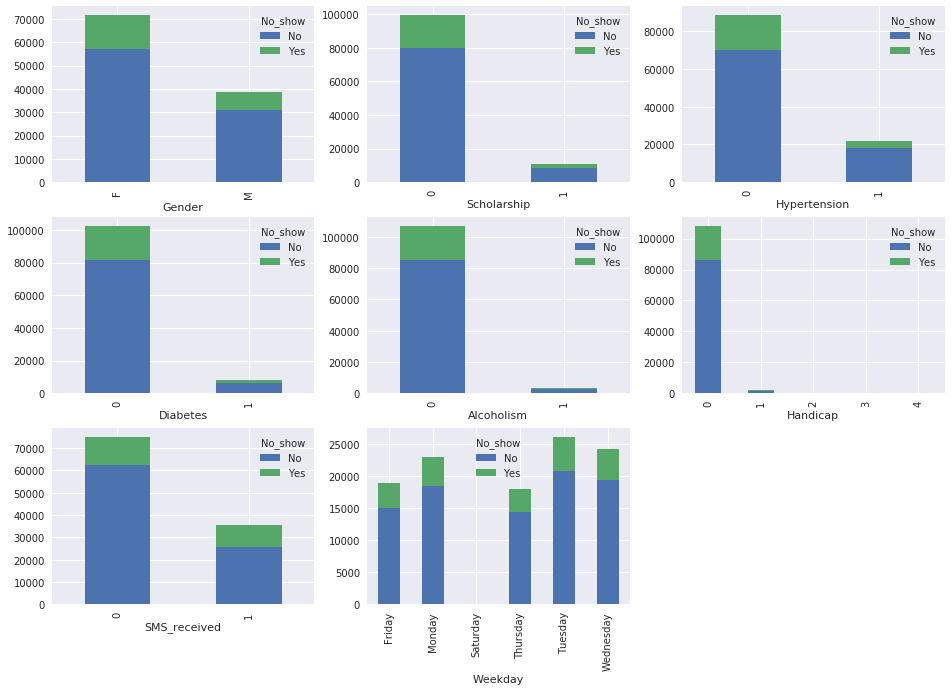

In [124]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


# check the categories to get the answer of the first Question

categorical_vars = ['Gender', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'Weekday']

fig = plt.figure(figsize=(16, 11))
for i, var in enumerate(categorical_vars):
    ax = fig.add_subplot(3, 3, i+1)
    df.groupby([var, 'No_show'])[var].count().unstack('No_show').plot(ax=ax, kind='bar', stacked=True)

> Men are more eager than women to attend medical appointments

> Who has a scholarship is more keen to attend medical appointments

> Those who have Hypertension or Diabetes or Alcoholism, are more careful to attend medical appointments

> Most of the visits are held on Tuesday, then Wednesday, then Monday, then Friday, and then Thursday

> The effect of sending a message is negligible

Text(0,0.5,'number of persons')

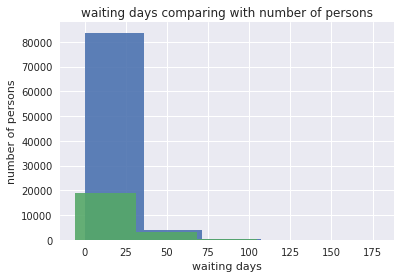

In [150]:
showed = df.No_show == 'No'
not_showed = df.No_show == 'Yes'
df.waiting_time[showed].hist(alpha=0.9, bins=5);
df.waiting_time[not_showed].hist(alpha=0.9, bins=5);

plt.title('waiting days comparing with number of persons')
plt.xlabel('waiting days')
plt.ylabel('number of persons')

> There is no significant impact of wait time on attendance or no-show

In [126]:
# use function to calculate the percentage of female to male
def percentage(amount,total):
    return (amount / total) * 100

In [127]:
not_attend = df['No_show'] == "Yes"
df_not_attend = df[not_attend]

In [128]:
df_not_attend['Gender'].count()

22319

In [129]:
df_not_attend_count = df_not_attend['Gender'].count()

In [130]:
males = df_not_attend['Gender'] == 'M'

In [131]:
male_count = df_not_attend[males]['Gender'].count()

In [132]:
print("the number of males that not attend", male_count)

the number of males that not attend 7725


In [133]:
females = df_not_attend['Gender'] == 'F'

In [134]:
female_count = df_not_attend[females]['Gender'].count()

In [135]:
print("the number of females that not attend", female_count)

the number of females that not attend 14594


In [136]:
print(percentage(male_count,df_not_attend_count))

34.6117657601


In [137]:
print(percentage(female_count,df_not_attend_count))

65.3882342399


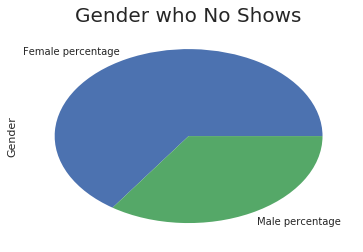

In [138]:
ax = df_not_attend.Gender.value_counts().plot(kind='pie',labels=['Female percentage','Male percentage']);
ax.set_title("Gender who No Shows",fontsize=20);

> The percentage of males who did not attend is less than the percentage of females who did not attend


### Research Question 2  (Does the neighborhood in which the patient live influence the patient’s decision to attend or not؟)

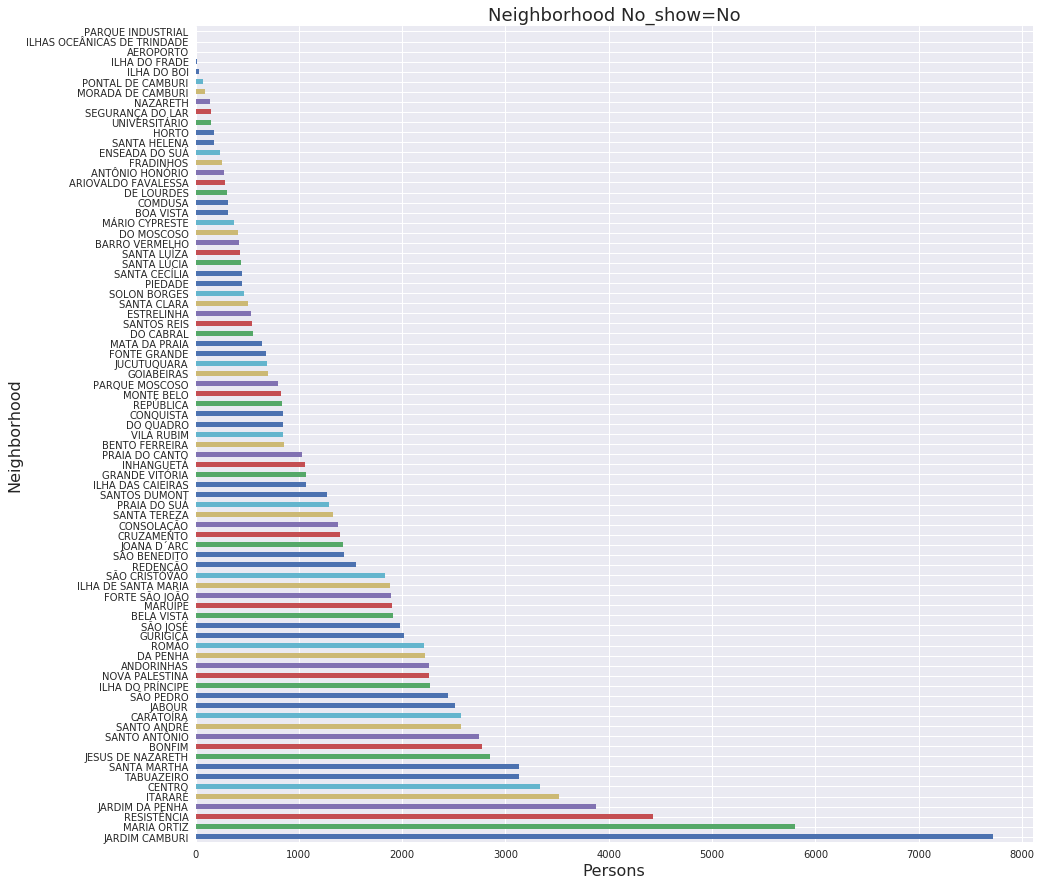

In [139]:
ax = df.Neighborhood.value_counts().plot(kind='barh',figsize=(15,15));
ax.set_ylabel('Neighborhood',fontsize=16);
ax.set_xlabel('Persons', fontsize=16);
ax.set_title('Neighborhood No_show=No',fontsize=18);

> The number of patients in each district, recorded in the available data

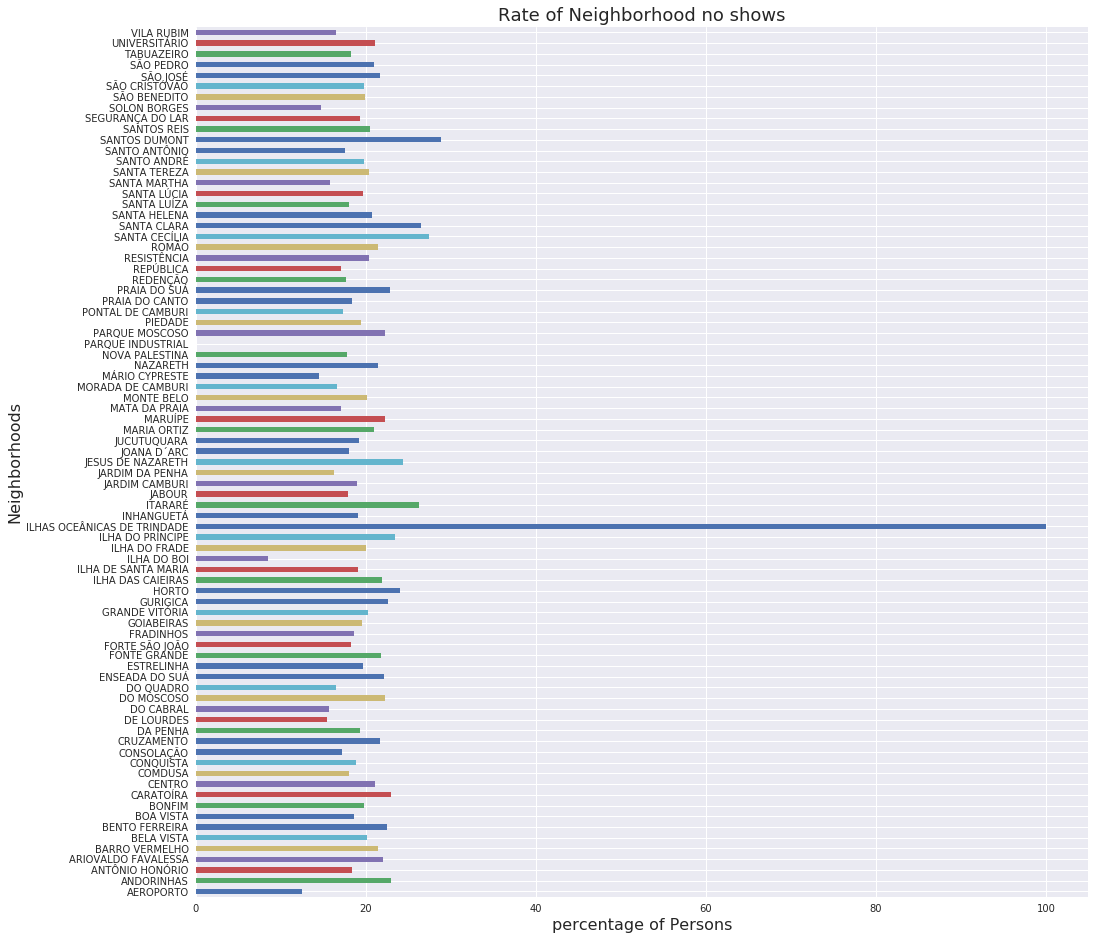

In [140]:
df_percentage = percentage(df_not_attend.Neighborhood.value_counts(),df.Neighborhood.value_counts())
ax = df_percentage.plot(kind='barh',figsize=(16,16));
ax.set_ylabel('Neighborhoods',fontsize=16);
ax.set_xlabel('percentage of Persons',fontsize=16);
ax.set_title('Rate of Neighborhood no shows',fontsize=18);

> The percentage of patients who do not attend in every neighborhood

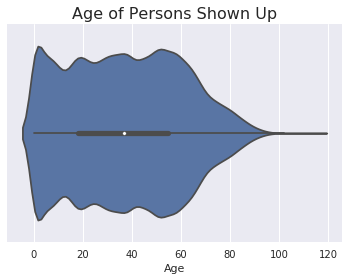

In [141]:
ax = sns.violinplot(x=df['Age']);
ax.set_title('Age of Persons Shown Up',fontsize=16);

> The most age of going to a hospital is less than a year, then it is between the ages of 50 and 60 years

<a id='conclusions'></a>
## Conclusions

> Men are more eager than women to attend medical appointments
> Who has a scholarship is more keen to attend medical appointments
> Those who have Hypertension or Diabetes or Alcoholism, are more careful to attend medical appointments
> Most of the visits are held on Tuesday, then Wednesday, then Monday, then Friday, and then Thursday
> The effect of sending a message is negligible
> The district where patients visit the hospital the most is Jardim Camburi
> The lowest neighborhood in which patients visit the hospital is parque industrial
> The most age of going to a hospital is less than a year, then it is between the ages of 50 and 60 years



## Limitations

> The study included chronic diseases such as diabetes and hypertension, and patients with these diseases were more keen to attend than others who were not infected.
Are there chronic diseases that make patients committed to attend and cannot not attend, such as patients with kidney failure, for example?

> Most of the patients who are keen to attend are under a year old or between 50 and 60
Is this because the appointments that are given to them are not appropriate for patients who are studying or working, or not?



In [142]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0